In [117]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from PIL import ImageChops
from PIL import ImageStat as stat

# statystyki

In [118]:
def statystyki(im):
    s = stat.Stat(im)
    print("extrema ", s.extrema)  # max i min
    print("count ", s.count)  # zlicza
    print("mean ", s.mean)  # srednia
    print("rms ", s.rms)  # pierwiastek średniokwadratowy 
    print("median ", s.median)  # mediana
    print("stddev ", s.stddev)  # odchylenie standardowe

tryb RGB
format PNG
rozmiar (200, 100)


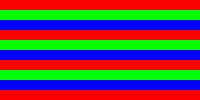

In [119]:
im = Image.open('pasy_3kolory.png')
print("tryb", im.mode)
print("format", im.format)
print("rozmiar", im.size)
w, h = im.size
im

In [120]:
def usrednij_obraz(obraz):
    t = np.asarray(obraz)
    tab = t.copy()
    srednie = t.mean(axis=(0, 1)).astype(np.uint8)
    print(srednie)
    for i in range(3):
        tab[:, :, i] = srednie[i]
    return Image.fromarray(tab)


im1 = usrednij_obraz(im)

[102  76  76]


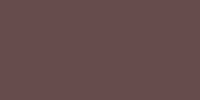

In [121]:
im1

In [122]:
statystyki(im)


extrema  [(0, 255), (0, 255), (0, 255)]
count  [20000, 20000, 20000]
mean  [102.0, 76.5, 76.5]
rms  [161.27616066858735, 139.66925216381736, 139.66925216381736]
median  [0, 0, 0]
stddev  [124.92397688194208, 116.85568022137392, 116.85568022137392]


In [123]:
statystyki(im1)

extrema  [(102, 102), (76, 76), (76, 76)]
count  [20000, 20000, 20000]
mean  [102.0, 76.0, 76.0]
rms  [102.0, 76.0, 76.0]
median  [102, 76, 76]
stddev  [0.0, 0.0, 0.0]


tryb RGB
format PNG
rozmiar (363, 432)


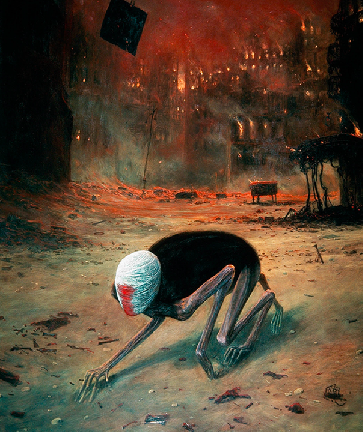

In [124]:
im2 = Image.open('beksinski.png')
print("tryb", im2.mode)
print("format", im2.format)
print("rozmiar", im2.size)
w, h = im2.size
im2

In [125]:
statystyki(im2)

extrema  [(0, 255), (0, 254), (0, 254)]
count  [156816, 156816, 156816]
mean  [92.12686843179267, 71.48291628405265, 51.6435121416182]
rms  [110.9660114614989, 86.19844015908052, 64.85120391220475]
median  [94, 67, 47]
stddev  [61.85544286984505, 48.17015430103693, 39.22532730954446]


# Histogram

In [126]:
def rysuj_histogram_RGB(obraz):
    hist = obraz.histogram()
    plt.title("histogram  ")
    plt.bar(range(256), hist[:256], color='r', alpha=0.5)
    plt.bar(range(256), hist[256:2 * 256], color='g', alpha=0.4)
    plt.bar(range(256), hist[2 * 256:], color='b', alpha=0.3)
    plt.show()


def rysuj_histogram_L(obraz):
    hist = obraz.histogram()
    plt.title("histogram  ")
    plt.bar(range(256), hist[:])
    plt.show()

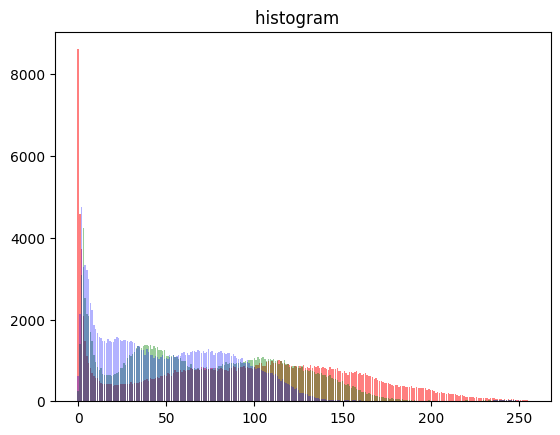

In [127]:
rysuj_histogram_RGB(im2)

Ile jest pikseli o wartości wybranego kanału równej podanej liczbie z zakresu od 0 do 255?

In [128]:
hist = im2.histogram()
print("kanał r ", hist[0])
print("kanał g ", hist[0 + 256])
print("kanał b ", hist[0 + 2 * 256])

kanał r  8611
kanał g  247
kanał b  623


Ile jest pikseli o podanej wartości np. [216  121  74]  ?  Napisać funkcję zlicz_piksele.

# pobieranie kanałów obrazu 

In [129]:
# Kanały pobrane jako obrazy
r, g, b = im2.split()  # powstają obrazy
print("tryb kanału r: ", r.mode)
print("tryb kanału g: ", g.mode)
print("tryb kanału b: ", b.mode)

tryb kanału r:  L
tryb kanału g:  L
tryb kanału b:  L


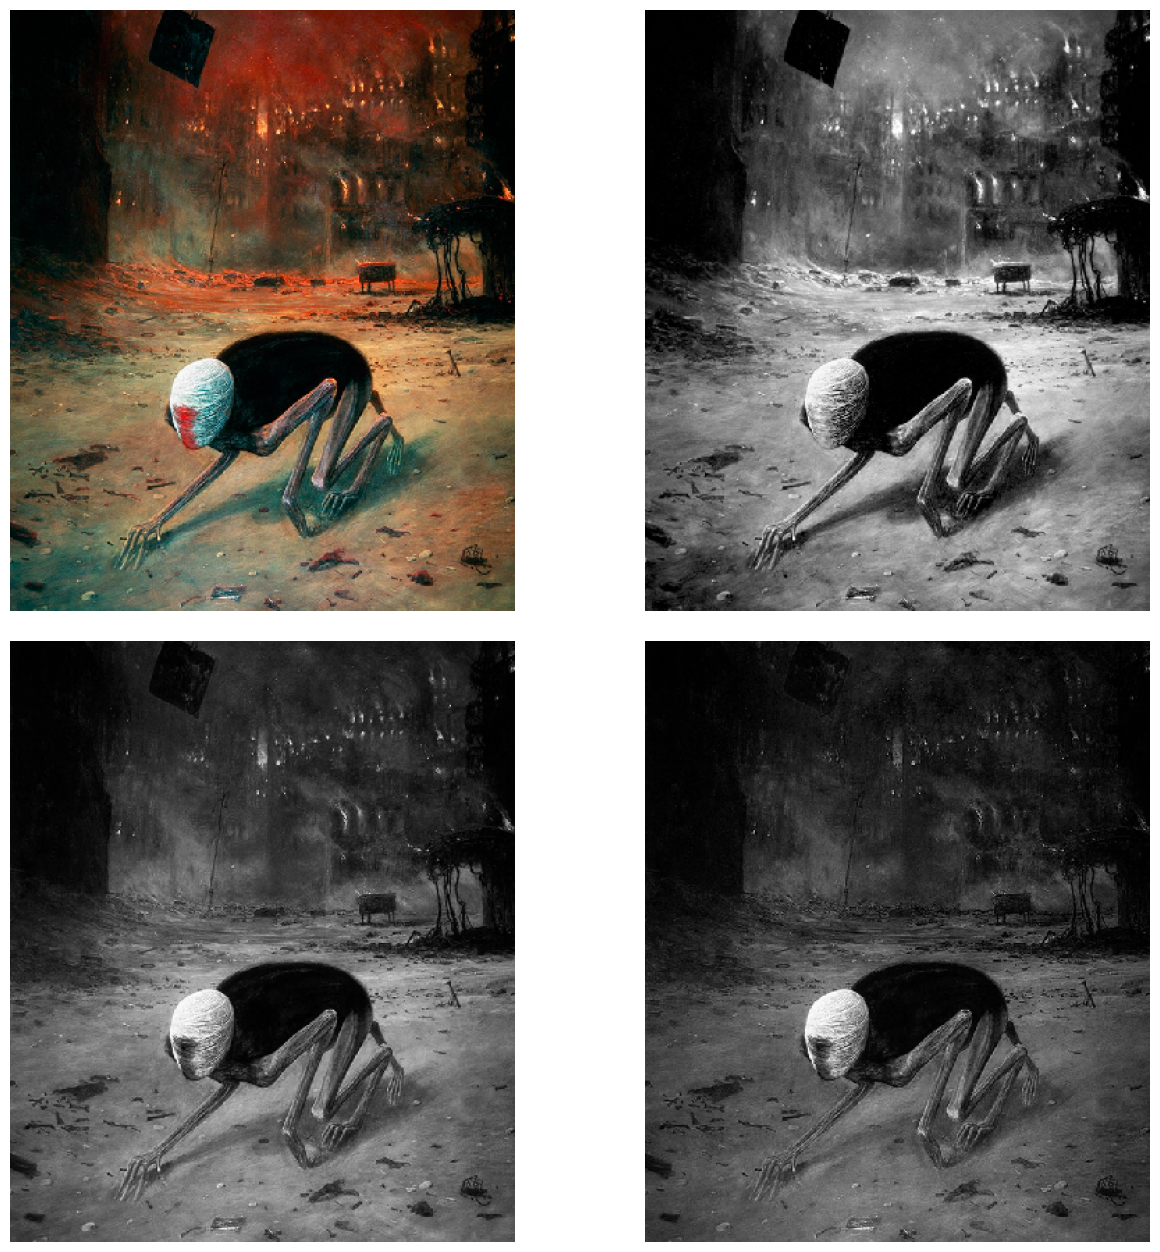

In [130]:
# przedstawienie 4 obrazów w jednym oknie plt
plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)  # ile obrazów w pionie, ile w poziomie, numer obrazu
plt.imshow(im2)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(r, "gray")
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(g, "gray")
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(b, "gray")
plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.savefig('figura1.png')
plt.show()

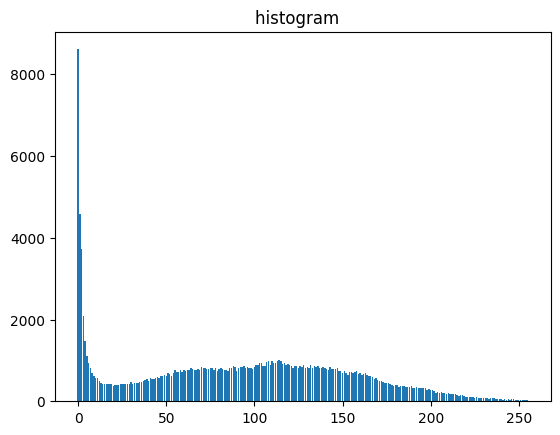

In [131]:
rysuj_histogram_L(r)

Łaczenie kanałow w jeden obraz RGB

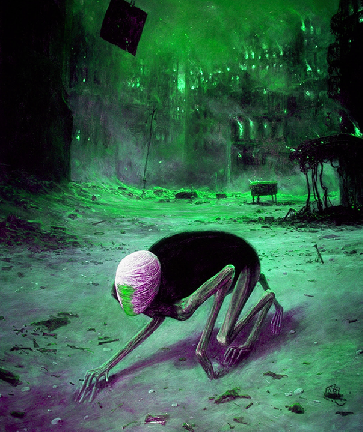

In [132]:
# efekt przestawienia  kanałow
im3 = Image.merge('RGB', (b, r, g))
im3

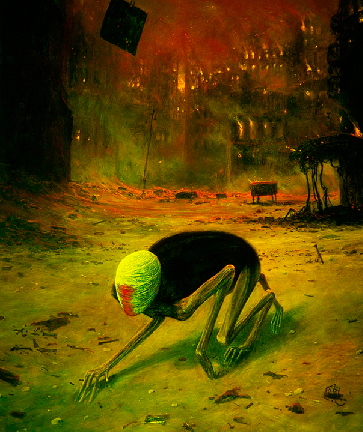

In [133]:
# własny obraz w trybie L jako kanał
w, h = im2.size
t = (h, w)
A = np.zeros(t, dtype=np.uint8)
A_im = Image.fromarray(A)  # czarny obraz
im4 = Image.merge('RGB', (r, g, A_im))
im4

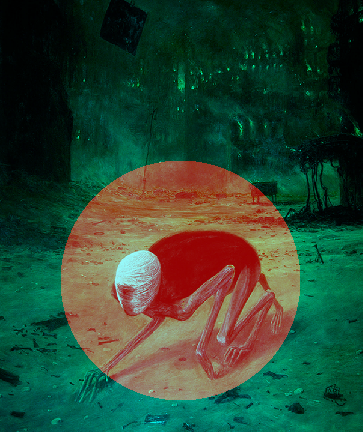

In [134]:
# własny obraz w trybie L jako kanał - drugi przykład
def rysuj_kolo(w, h, r, m, n, kolor, kolor_tla):  # koło o promieniu r i środku m, n, kolor = 0 lub 255
    t = (h, w)  # rysuje kwadratowy obraz
    tab = np.zeros(t, dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            if (i - n) ** 2 + (j - m) ** 2 < r ** 2:  # wzór na koło o środku (m_s, n_s) i promieniu r
                tab[i, j] = kolor
            else:
                tab[i, j] = kolor_tla
    return tab


kolo_im = Image.fromarray(rysuj_kolo(363, 432, 120, 180, 280, 150, 0))
im5 = Image.merge('RGB', (kolo_im, g, b))
im5

# obraz pokazujący różnice

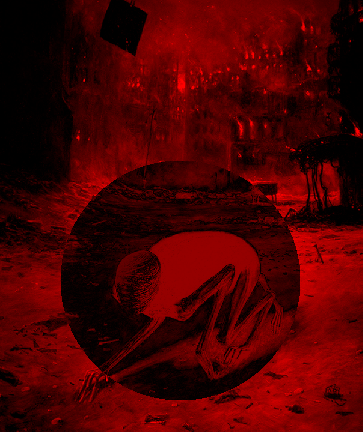

In [135]:
diff = ImageChops.difference(im2, im5)
diff

In [136]:
statystyki(diff)

extrema  [(0, 255), (0, 0), (0, 0)]
count  [156816, 156816, 156816]
mean  [74.16592056932966, 0.0, 0.0]
rms  [91.23367521236794, 0.0, 0.0]
median  [72, 0, 0]
stddev  [53.13190866945893, 0.0, 0.0]


1. Pobierz statystyki obrazu im i je skomentuj\
    a. przedstaw histogram obrazu im na diagramie plt, przedstaw histogramy wszystkich jego kanałów na diagramach plt.\
    b. Ile jest pikseli o wartości 155 na każdym z kanałów?\
    c. Napisz funkcję zlicz_piksele(obraz, kolor), która zlicza, ile jest pikseli w danym kolorze. Ile jest pikseli o wartości [155,155,155] w obrazie im?

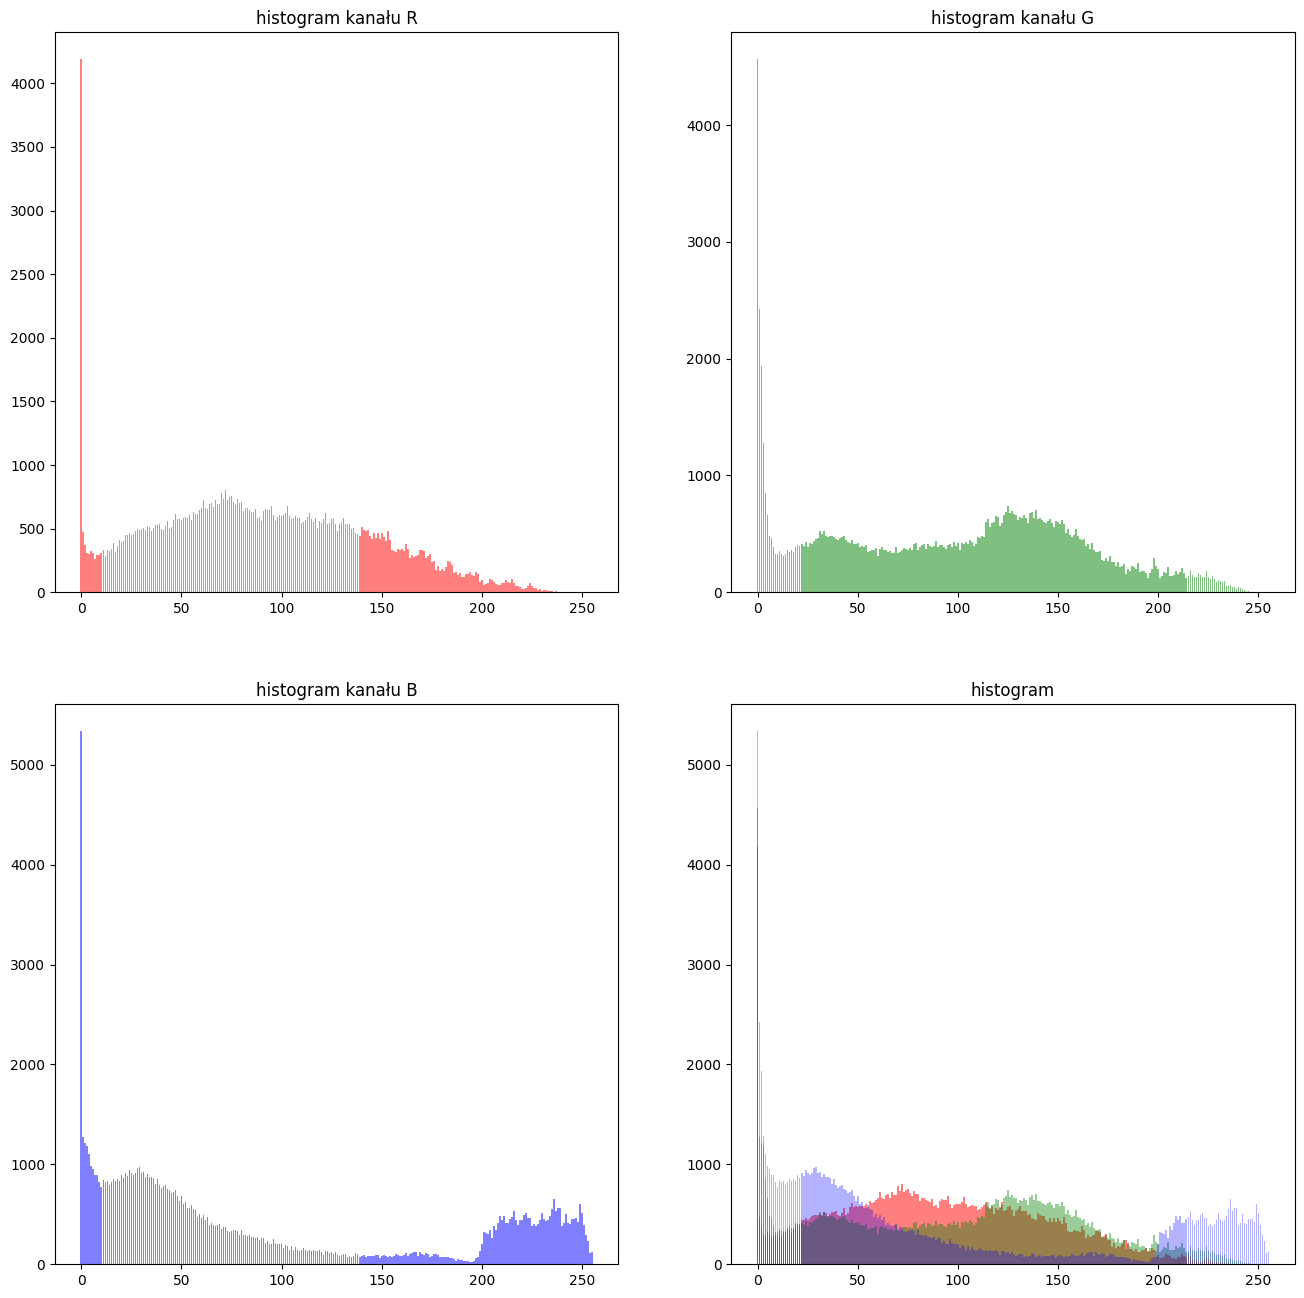

In [137]:
im = Image.open('obraz.png')


def rysuj_histogram_RGB(obraz):
    hist = obraz.histogram()
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 2, 1)  # ile obrazów w pionie, ile w poziomie, numer obrazu
    plt.title("histogram kanału R")
    plt.bar(range(256), hist[:256], color='r', alpha=0.5)
    plt.subplot(2, 2, 2)
    plt.title("histogram kanału G")
    plt.bar(range(256), hist[256:2 * 256], color='g', alpha=0.5)
    plt.subplot(2, 2, 3)
    plt.title("histogram kanału B")
    plt.bar(range(256), hist[2 * 256:], color='b', alpha=0.5)
    plt.subplot(2, 2, 4)
    plt.title("histogram")
    plt.bar(range(256), hist[:256], color='r', alpha=0.5)
    plt.bar(range(256), hist[256:2 * 256], color='g', alpha=0.4)
    plt.bar(range(256), hist[2 * 256:], color='b', alpha=0.3)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.savefig('histogramy.png')


rysuj_histogram_RGB(im)

b. Ile jest pikseli o wartości 155 na każdym z kanałów?

In [138]:
im_histogram = im.histogram()
print(f'Kanał R: {im_histogram[155]}')
print(f'Kanał G: {im_histogram[155 + 256]}')
print(f'Kanał B: {im_histogram[155 + 2 * 256]}')

Kanał R: 329
Kanał G: 542
Kanał B: 72


c. Napisz funkcję zlicz_piksele(obraz, kolor), która zlicza, ile jest pikseli w danym kolorze. Ile jest pikseli o wartości [155,155,155] w obrazie im?

In [139]:
def zlicz_piksele(obraz, kolor):
    t = np.asarray(obraz)
    liczba_pikseli = np.sum(np.all(t == np.array(kolor), axis=-1))
    print(f'Łącznie pikseli o wartości {kolor}: {liczba_pikseli}')


zlicz_piksele(im, [155, 155, 155])

Łącznie pikseli o wartości [155, 155, 155]: 0


2. Zapisz obraz im w formacie jpg a potem wczytaj jako im_jpg.\
    a. Porównaj statystyki obrazów im oraz im_jpg. Dla czego te obrazy się różnią?\
    b. Zastosuj ImageChops.difference, aby otrzymać różnicę tych obrazów. Pobierz statystyki różnicy i je
    skomentuj\
    c. Jak zmienią się statystyki, gdy jeszcze dwa razy zapiszesz obraz im_jpg w formacie jpg?

In [140]:
im_jpg = Image.open('obraz.jpg')
im_jpg3 = Image.open('obraz3.jpg')
print(f'===== Statystyki obrazu PNG =====')
statystyki(im)
print(f'===== Statystyki obrazu JPG =====')
statystyki(im_jpg)
print(f'===== Statystyki obrazu różnic =====')
diff = ImageChops.difference(im, im_jpg)
statystyki(diff)

===== Statystyki obrazu PNG =====
extrema  [(0, 255), (0, 255), (0, 255)]
count  [100000, 100000, 100000]
mean  [89.19494, 95.61805, 90.70041]
rms  [103.81432088108076, 114.93160735846341, 124.96983720082218]
median  [86, 101, 52]
stddev  [53.11944934199149, 63.768823763634686, 85.97031950523332]
===== Statystyki obrazu JPG =====
extrema  [(0, 255), (0, 255), (0, 255)]
count  [100000, 100000, 100000]
mean  [89.25336, 95.75403, 91.18454]
rms  [103.46635791405824, 114.82711556945075, 124.48258046811209]
median  [85, 101, 55]
stddev  [52.33665014796419, 63.37532807614569, 84.74250707282857]
===== Statystyki obrazu różnic =====
extrema  [(0, 66), (0, 42), (0, 104)]
count  [100000, 100000, 100000]
mean  [3.91044, 2.61936, 7.02085]
rms  [5.984981202978001, 3.9471736723888906, 10.662925020837388]
median  [3, 2, 4]
stddev  [4.53083425059889, 2.952817839014117, 8.025312160751131]


Odpowiedź:\
Obrazy róźnią się ponieważ zapisując obraz w formacie JPG następuje kompresja stratna, tracimy część danych obrazu.
Ekstrema nie zmieniły się (mamy pełny zakres barw). \
Średnia różni się minimalnie, największa różnica w kanale niebieskim, co oznacza że utraciliśmy najwięcej niebieskiej barwy.\
Mediana przesuneła się w kanale niebieskim o 3 wartości, wprowadziła lekką zmianę barwy.\
Mniejsze odchylenie standardowe w JPG oznacza rozmycie szczegółów.\
Minimalny spadek RMS, czyli mamy drobną utratę szczegółów i kontrastu.

c. Jak zmienią się statystyki, gdy jeszcze dwa razy zapiszesz obraz im_jpg w formacie jpg?

In [141]:
print(f'===== Statystyki obrazu 3xJPG =====')
statystyki(im_jpg3)
print(f'===== Statystyki różnic PNG vs 3xJPG =====')
diff2 = ImageChops.difference(im, im_jpg3)
statystyki(diff2)
diff2.show()

===== Statystyki obrazu 3xJPG =====
extrema  [(0, 255), (0, 254), (0, 255)]
count  [100000, 100000, 100000]
mean  [89.29887, 95.83688, 91.84461]
rms  [103.2491918128176, 114.67566210840032, 124.26463523464751]
median  [85, 101, 56]
stddev  [51.82767047362924, 62.97459735373939, 83.70344786176912]
===== Statystyki różnic PNG vs 3xJPG =====
extrema  [(0, 75), (0, 51), (0, 113)]
count  [100000, 100000, 100000]
mean  [4.61485, 3.12475, 8.61772]
rms  [7.224781657600457, 4.765258649853122, 13.013960196650364]
median  [3, 2, 5]
stddev  [5.558833463731396, 3.597725314347942, 9.751823521865026]


Odpowiedź:\
Po zapisaniu jeszcze dwa razy jako JPG:\
Średnia rośnie, kolory stają się jaśniejsze - tracimy kontrast.\
Mniejsze ochylenie standardowe, większe rozmycie szczegółów.\
Niewielka zmiana mediany.\
Dalszy spadek RMS to spadek kontrastu i energii obrazu.\
\
Każde kolejne zapisanie pliku JPG powoduje kumulację strat.\
Kompresja działa na już skompresowanych danych, więc pojawia się coraz większe rozmycie, kolory się lekko zmieniają, kontrast i ostrość maleją, statystyki (stddev, RMS) spadają systematycznie.

3. Wykonaj następujące polecenia dla obrazu im\
    a. Wczytaj tablicę obrazu i pobierz kanały t_r, t_g, t_b obrazu z tablicy obrazu, zapisz jako obrazy im_r, im_g, im_b\
    b. Utwórz obraz im1 przez scalenie metodą merge obrazów im_r, im_g, im_b i zastosuj ImageChops.difference(im, im1) do porównania otrzymanego obrazu z obrazem wejściowym.\
    c. Umieść na jednej figurze plt (fig1.png) obrazy im, im1 i wynik porównania\
    d. Czy są jakieś różnice?

In [142]:
t = np.asarray(im)
t_r = t[:, :, 0]
t_g = t[:, :, 1]
t_b = t[:, :, 2]
im_r = Image.fromarray(t_r)
im_g = Image.fromarray(t_g)
im_b = Image.fromarray(t_b)
im1 = Image.merge("RGB", (im_r, im_g, im_b))
diff = ImageChops.difference(im, im1)

c. Umieść na jednej figurze plt (fig1.png) obrazy im, im1 i wynik porównania

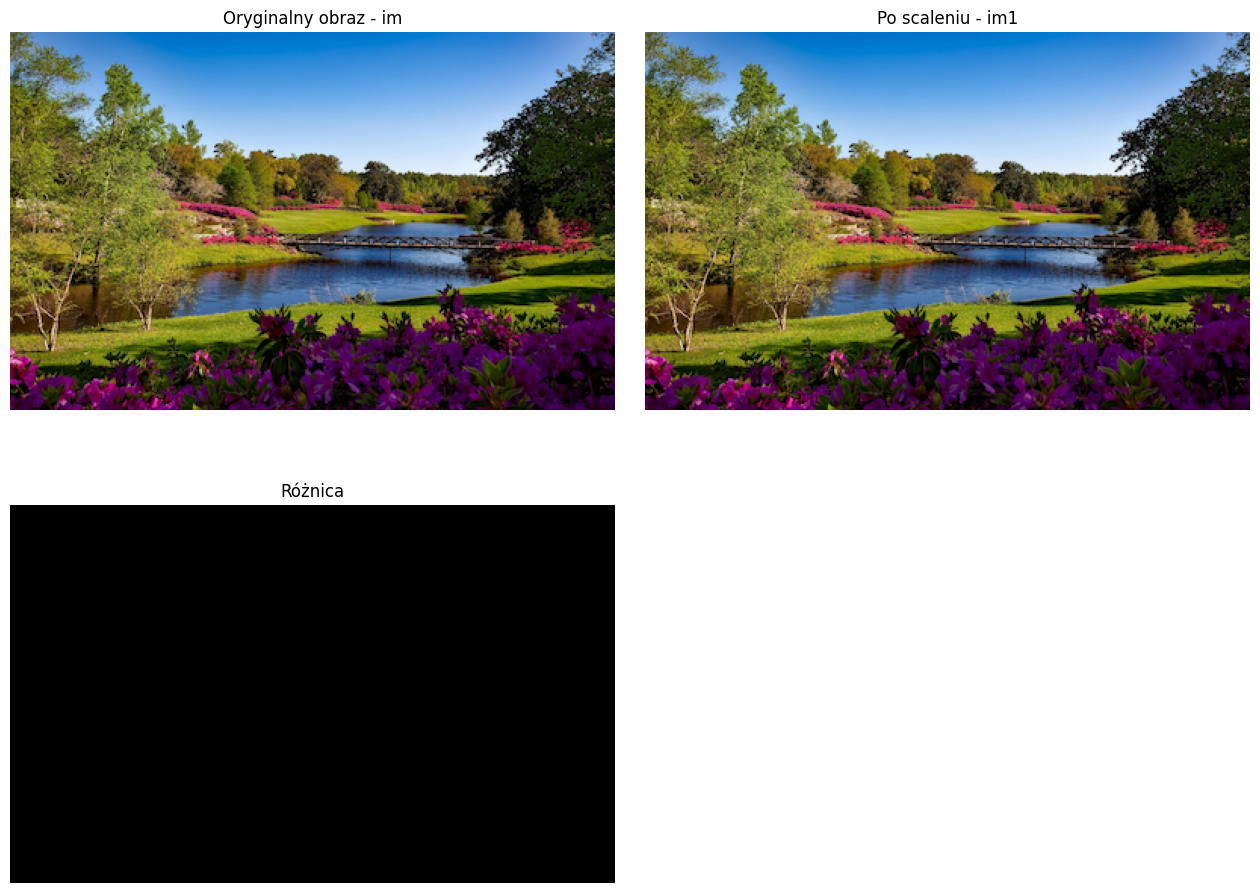

In [143]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
plt.title("Oryginalny obraz - im")
plt.axis('off')
plt.imshow(im)
plt.subplot(2, 2, 2)
plt.title("Po scaleniu - im1")
plt.axis('off')
plt.imshow(im1)
plt.subplot(2, 2, 3)
plt.title("Różnica")
plt.axis('off')
plt.imshow(diff)
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.savefig('fig1.png')
plt.show()

d. Czy są jakieś różnice?

In [144]:
print(f'===== Statystyki różnic =====')
statystyki(diff)

===== Statystyki różnic =====
extrema  [(0, 0), (0, 0), (0, 0)]
count  [100000, 100000, 100000]
mean  [0.0, 0.0, 0.0]
rms  [0.0, 0.0, 0.0]
median  [0, 0, 0]
stddev  [0.0, 0.0, 0.0]


Odpowiedź:\
Nie widać różnic w obrazach, wszystkie statystyki w obrazie różnic to 0, czyli otrzymany obraz w wyniku złączenia trzech kanałów jest taki sam jak oryginał.

4. Napisz funkcję mieszaj_kanaly(obraz), która w sposób losowy miesza kanały r, g, b pobrane metodą split z
danego obrazu oraz ich negatywy nr,ng,nb. Dopuszczalne jest losowanie z powtórzeniami tzn. może być b, r,
g ale też b, b, g .\
    a. Zastosuj tę funkcje do obrazu im. Otrzymany obraz nazwij mix i zapisz w formacie png.\
    b. Napisz funkcję rozpoznaj_mix(obraz, mix), która dla danych obrazów w trybie RGB obraz i mix rozpoznaje w jaki sposób mix powstał z obrazu (zmiana kolejności kanałów).

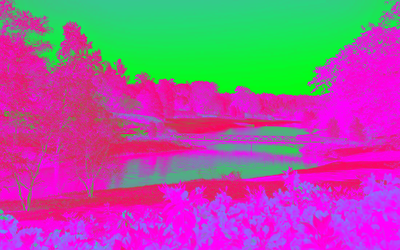

In [145]:
import random


def mieszaj_kanaly(obraz):
    r, g, b = obraz.split()
    nr = Image.fromarray(255 - np.array(r))
    ng = Image.fromarray(255 - np.array(g))
    nb = Image.fromarray(255 - np.array(b))
    kanaly = [r, g, b, nr, ng, nb]
    nazwy_kanalow = ["R", "G", "B", "negatyw R", "negatyw G", "negatyw B"]
    wybrane = random.choices(kanaly, k=3)
    mix = Image.merge("RGB", wybrane)
    wybrane_nazwy = [nazwy_kanalow[kanaly.index(k)] for k in wybrane]
    # print("Wybrane kanały:", wybrane_nazwy)
    return mix


mix = mieszaj_kanaly(im)
mix

b. Napisz funkcję rozpoznaj_mix(obraz, mix), która dla danych obrazów w trybie RGB obraz i mix
rozpoznaje w jaki sposób mix powstał z obrazu (zmiana kolejności kanałów).

In [146]:
def rozpoznaj_mix(obraz, mix):
    r, g, b = obraz.split()
    nr = Image.fromarray(255 - np.array(r, dtype=np.uint8))
    ng = Image.fromarray(255 - np.array(g, dtype=np.uint8))
    nb = Image.fromarray(255 - np.array(b, dtype=np.uint8))

    oryginalne_kanaly = [r, g, b, nr, ng, nb]
    nazwy_kanalow = ["R", "G", "B", "negatyw R", "negatyw G", "negatyw B"]
    wynik = []

    for mix_kanal in mix.split():
        for nazwa, k in zip(nazwy_kanalow, oryginalne_kanaly):
            if np.all(np.array(mix_kanal) == np.array(k)):
                wynik.append(nazwa)
                break
    print('Rozpoznano:')
    print(f'R -> {wynik[0]}')
    print(f'G -> {wynik[1]}')
    print(f'B -> {wynik[2]}')


rozpoznaj_mix(im, mix)

Rozpoznano:
R -> negatyw B
G -> B
B -> negatyw G


5. Dlaczego polecenie r, g, b = im.split() nie działa, gdy im = Image.open('beksinski1.png')?

In [147]:
im = Image.open('beksinski.png')
im1 = Image.open('beksinski1.png')
print('===== beksinski.png =====')
print(im.mode)
print('===== beksinski1.png =====')
print(im1.mode)
# r, g, b = im1.split()

===== beksinski.png =====
RGB
===== beksinski1.png =====
RGBA


Odpowiedź:\
Polecenie nie działa, ponieważ mamy 4 kanały (obraz RGBA), a podajemy tylko 3 zmienne, kanał 4 jest od alpha, czyli przeźroczystość.